<a href="https://www.kaggle.com/code/wabass/online-food-data-visualization?scriptVersionId=173306056" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/online-food-dataset/onlinefoods.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import squarify
import folium
from folium.plugins import HeatMap


df  = pd.read_csv("/kaggle/input/online-food-dataset/onlinefoods.csv")

In [3]:
df

,Age,Gender,Marital Status,Occupation,Monthly Income,Educational Qualifications,Family size,latitude,longitude,Pin code,Output,Feedback,Unnamed: 12
0,20,Female,Single,Student,No Income,Post Graduate,4,12.9766,77.5993,560001,Yes,Positive,Yes
1,24,Female,Single,Student,Below Rs.10000,Graduate,3,12.9770,77.5773,560009,Yes,Positive,Yes
2,22,Male,Single,Student,Below Rs.10000,Post Graduate,3,12.9551,77.6593,560017,Yes,Negative,Yes
3,22,Female,Single,Student,No Income,Graduate,6,12.9473,77.5616,560019,Yes,Positive,Yes
4,22,Male,Single,Student,Below Rs.10000,Post Graduate,4,12.9850,77.5533,560010,Yes,Positive,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...
383,23,Female,Single,Student,No Income,Post Graduate,2,12.9766,77.5993,560001,Yes,Positive,Yes
384,23,Female,Single,Student,No Income,Post Graduate,4,12.9854,77.7081,560048,Yes,Positive,Yes
385,22,Female,Single,Student,No Income,Post Graduate,5,12.9850,77.5533,560010,Yes,Positive,Yes
386,23,Male,Single,Student,Below Rs.10000,Post Graduate,2,12.9770,77.5773,560009,Yes,Positive,Yes


**Age:** This attribute refers to the age of the individual, typically recorded in years. It provides insight into the demographic distribution and age-related trends within the dataset.

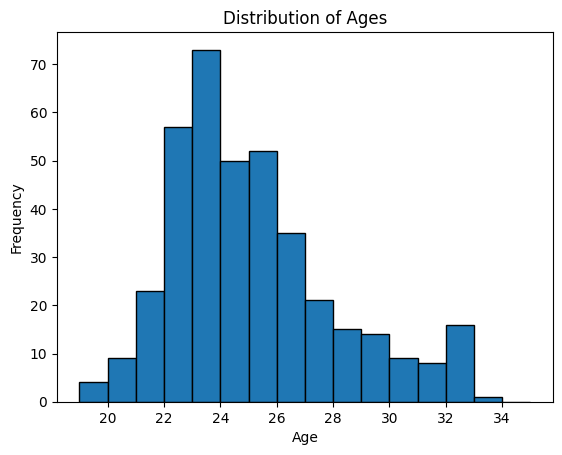

In [4]:
# Specify the age column name
age_column = 'Age'

# Define the bins for age groups
bins = [19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35]

# Create histogram
plt.hist(df[age_column], bins=bins, edgecolor='black')

# Set labels and title
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Ages')

# Show plot
plt.show()

**Gender:** Gender denotes the classification of individuals as male, female, or other, based on societal norms or self-identification. It helps analyze gender-based patterns and behaviors within the dataset.

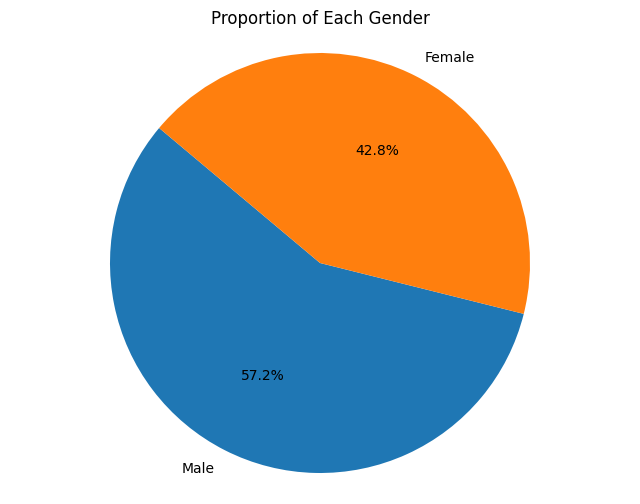

In [5]:
# Specify the gender column name
gender_column = 'Gender'

# Count the occurrences of each gender
gender_counts = df[gender_column].value_counts()

# Plotting the pie chart
plt.figure(figsize=(8, 6))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Proportion of Each Gender')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Show plot
plt.show()

**Marital Status:** This attribute indicates whether an individual is single, married, divorced, widowed, or in another marital arrangement. It helps understand family structures and their impact on various aspects within the dataset.

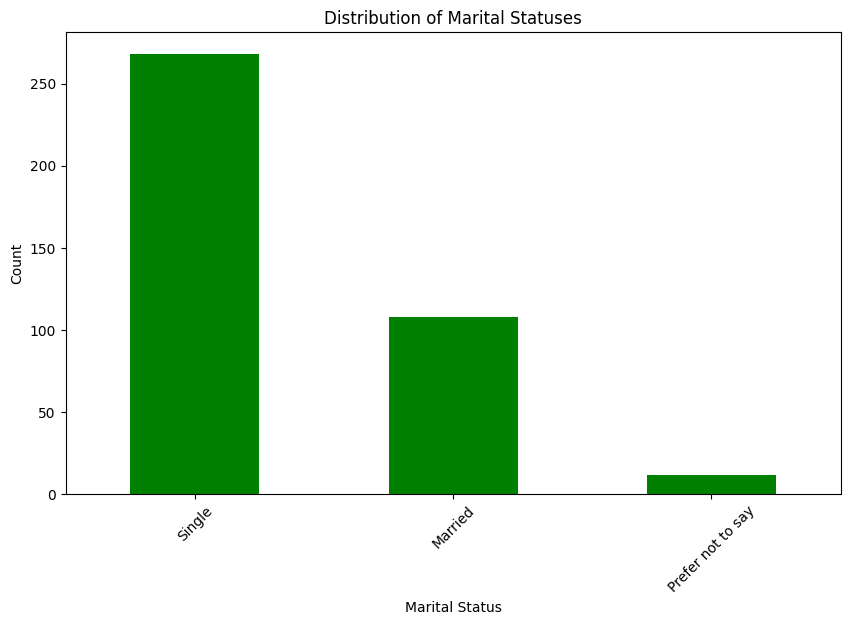

In [6]:
# Specify the marital status column name
marital_status_column = 'Marital Status'

# Count the occurrences of each marital status
marital_status_counts = df[marital_status_column].value_counts()

# Plotting the bar chart
plt.figure(figsize=(10, 6))
marital_status_counts.plot(kind='bar', color='green')
plt.title('Distribution of Marital Statuses')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Show bar chart
plt.show()




**Occupation:** Occupation specifies the type of work or profession undertaken by an individual. It offers insights into the employment status, economic activities, and skill sets present within the dataset.

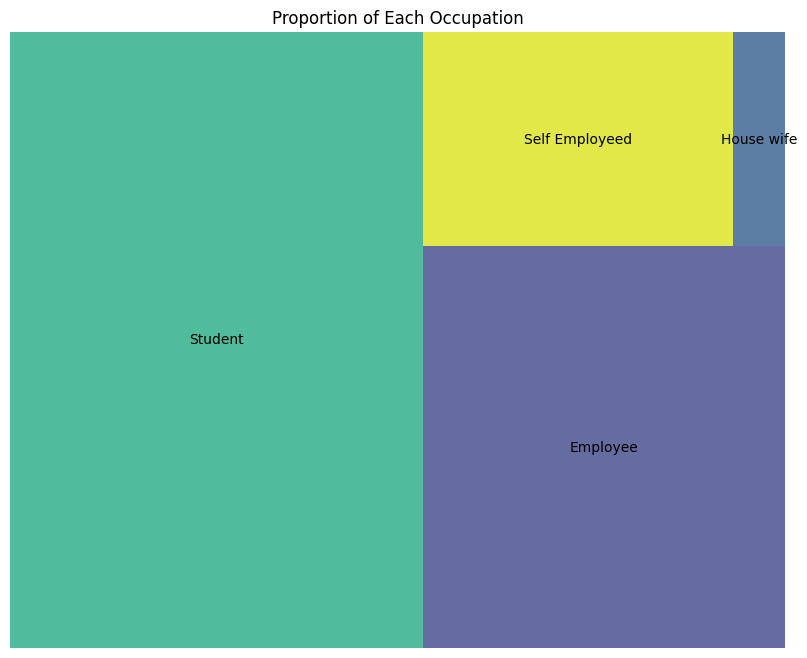

In [7]:
# Specify the occupation column name
occupation_column = 'Occupation'

# Count the occurrences of each occupation
occupation_counts = df[occupation_column].value_counts()

# Calculate proportion of each occupation
proportions = occupation_counts / occupation_counts.sum()

# Plotting the treemap
plt.figure(figsize=(10, 8))
squarify.plot(sizes=proportions, label=proportions.index, alpha=0.8)
plt.axis('off')
plt.title('Proportion of Each Occupation')
plt.show()

**Monthly Income:** Monthly Income refers to the amount of money earned by an individual within a month. It provides valuable information about the economic status and purchasing power of individuals within the dataset.

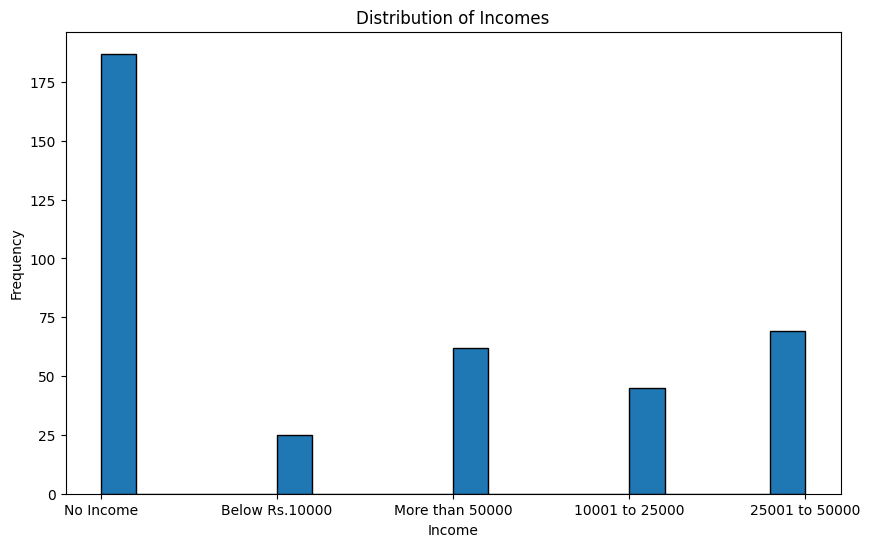

In [8]:
# Specify the income column name
income_column = 'Monthly Income'

# Plotting the histogram
plt.figure(figsize=(10, 6))
plt.hist(df[income_column], bins=20, edgecolor='black')  # Adjust the number of bins as needed
plt.title('Distribution of Incomes')
plt.xlabel('Income')
plt.ylabel('Frequency')

# Show histogram
plt.show()


**Educational Qualifications:** This attribute describes the educational attainment of individuals, including degrees, diplomas, or certifications. It helps assess the level of education and skill levels present in the dataset

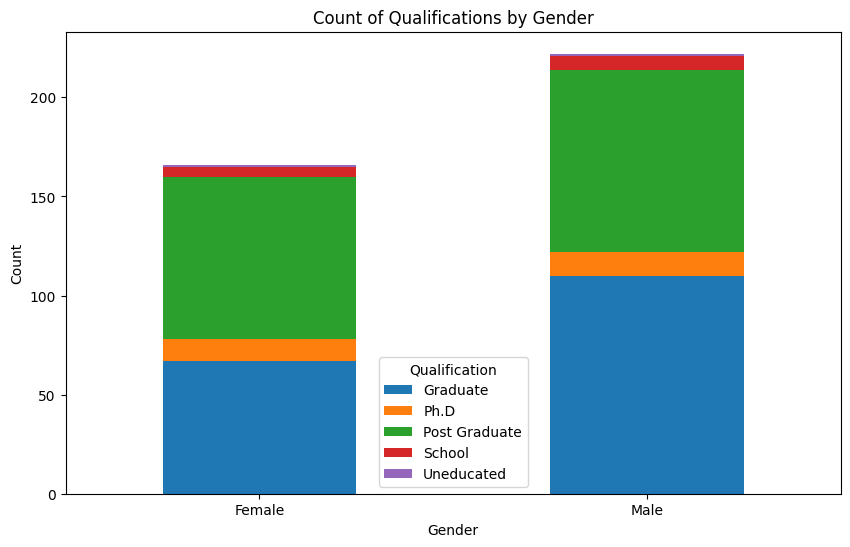

In [9]:
# Specify the qualification column name
qualification_column = 'Educational Qualifications'

# Group by gender and qualification, and count occurrences
qualification_counts = df.groupby(['Gender', qualification_column]).size().unstack()

# Plotting the stacked bar chart
qualification_counts.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Count of Qualifications by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(rotation=0)  # Rotate x-axis labels if needed

# Show stacked bar chart
plt.legend(title='Qualification')
plt.show()

**Family Size:** Family Size indicates the number of members in an individual's household. It offers insights into household composition, dependency ratios, and family-related dynamics within the dataset.

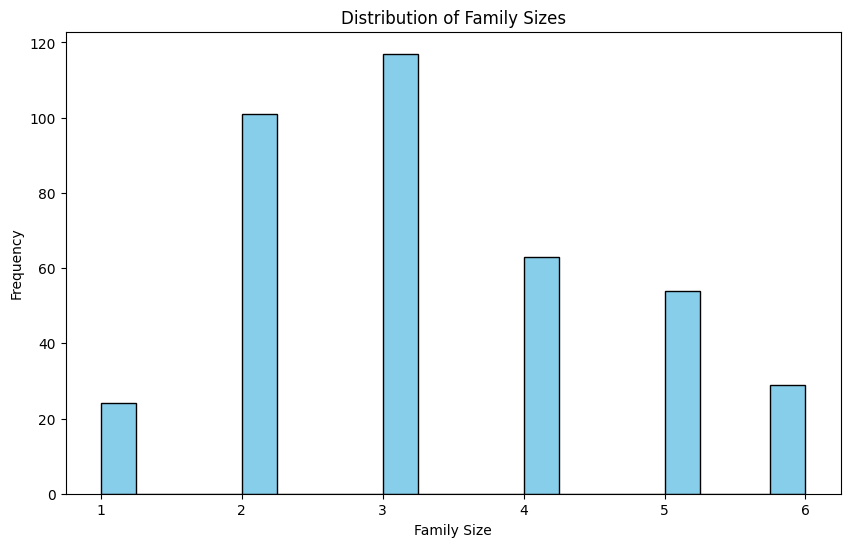

In [10]:


# Specify the family size column name
family_size_column = 'Family size'

# Plotting the histogram
plt.figure(figsize=(10, 6))
plt.hist(df[family_size_column], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Family Sizes')
plt.xlabel('Family Size')
plt.ylabel('Frequency')

# Show histogram
plt.show()


**Latitude:** Latitude specifies the angular distance of a location north or south of the Earth's equator. It provides geographic coordinates that can be used for spatial analysis and mapping purposes.
**Longitude:** Longitude denotes the angular distance of a location east or west of the Prime Meridian. Like latitude, it provides geographic coordinates for spatial analysis and mapping within the dataset.

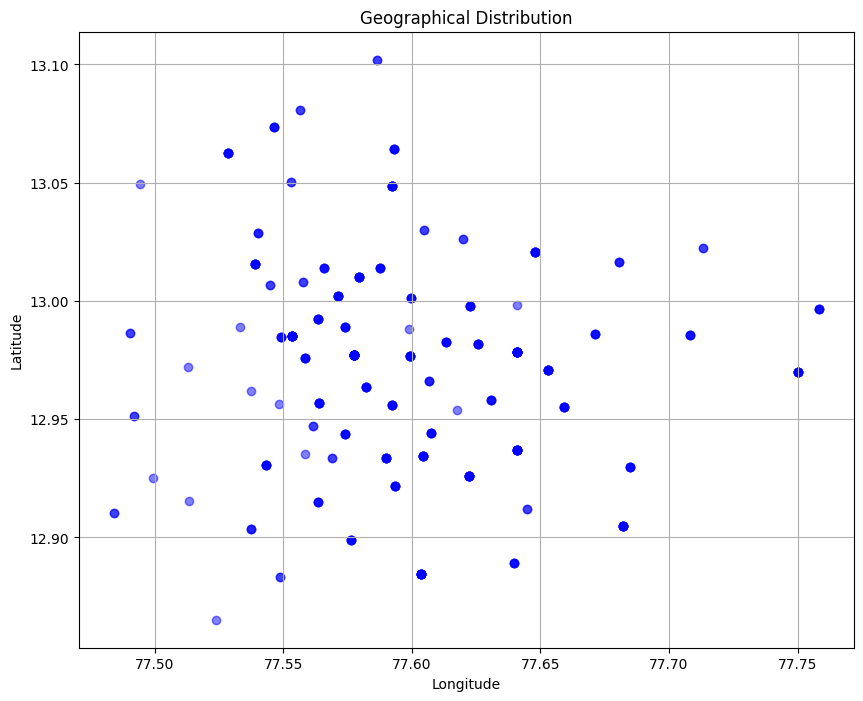

In [11]:
# Specify the latitude and longitude column names
latitude_column = 'latitude'
longitude_column = 'longitude'

# Plotting the scatter plot
plt.figure(figsize=(10, 8))
plt.scatter(df[longitude_column], df[latitude_column], color='blue', alpha=0.5)
plt.title('Geographical Distribution')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Show scatter plot
plt.grid(True)
plt.show()